<a href="https://colab.research.google.com/github/yyynbone/dogvscat/blob/master/Dropout_and_Batch_Normalization_in_2D_cnn_dogvscat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## sign in kaggle, and download data 

In [39]:
!pip install tensorflow-gpu

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [0]:
!rm -rf /content/dogvscat

In [44]:
!git clone https://github.com/yyynbone/dogvscat

Cloning into 'dogvscat'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 37416 (delta 0), reused 5 (delta 0), pack-reused 37410
Receiving objects: 100% (37416/37416), 810.40 MiB | 43.06 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (37500/37500), done.


In [0]:
test_dir="/content/dogvscat/data/test"
train_dir="/content/dogvscat/data/train"
img_width=32
img_height=32
batch_size=50

In [0]:
datagen=ImageDataGenerator(rescale=1./255)

In [47]:
train_generator=datagen.flow_from_directory(directory=train_dir,target_size=(img_width,img_height),classes=["cats","dogs"],batch_size=batch_size,color_mode="rgb",class_mode="binary")

Found 25000 images belonging to 2 classes.


In [48]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [49]:
len(train_generator) ##test图片数/batch_size 

500

In [51]:
test_generator=datagen.flow_from_directory(test_dir,target_size=(img_width,img_height),classes=["cats","dogs"],batch_size=batch_size,color_mode="rgb",class_mode="binary")

Found 223 images belonging to 2 classes.


## Build CNN Base Model

In [0]:
model=Sequential()
model.add(Conv2D(64,3,padding="same",activation="relu",kernel_initializer="he_uniform",input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(1,activation="sigmoid"))

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2097280   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 2,099,201
Trainable params: 2,099,201
Non-trainable params: 0
_________________________________________________________________


In [0]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [55]:
history = model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=15,verbose=1,validation_data=test_generator,validation_steps=len(test_generator))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 5 steps
Epoch 1/15
500/500 [==============================] - 97s 195ms/step - loss: 0.6807 - accuracy: 0.5769 - val_loss: 0.6308 - val_accuracy: 0.6457
Epoch 2/15
500/500 [==============================] - 96s 192ms/step - loss: 0.6349 - accuracy: 0.6368 - val_loss: 0.6572 - val_accuracy: 0.6099
Epoch 3/15
500/500 [==============================] - 95s 190ms/step - loss: 0.5567 - accuracy: 0.7189 - val_loss: 0.5845 - val_accuracy: 0.7175
Epoch 4/15
500/500 [==============================] - 96s 191ms/step - loss: 0.5100 - accuracy: 0.7546 - val_loss: 0.5950 - val_accuracy: 0.6816
Epoch 5/15
500/500 [==============================] - 95s 190ms/step - loss: 0.4780 - accuracy: 0.7732 - val_loss: 0.5893 - val_accuracy: 0.7309
Epoch 6/15
500/500 [==============================] - 97s 194ms/step - loss: 0.4481 - accuracy: 0.7880 - val_loss: 0.5542 - val_accuracy: 0.7309
Epoch 7/15
500/500 [==================

In [0]:
import matplotlib.pyplot as plt
def plot_acc_loss(history):
  plt.plot(history.history["accuracy"])
  plt.plot(history.history["val_accuracy"])
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend(["accuracy","val_accu"])
  plt.show()

  plt.plot(history.history["loss"])
  plt.plot(history.history["val_loss"])
  plt.title("loss")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend(["loss","val_loss"])
  plt.show()

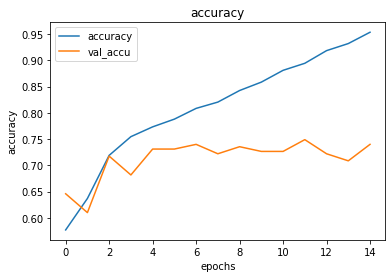

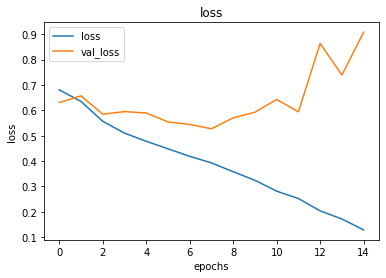

In [57]:
plot_acc_loss(history)

In [58]:
train_generator

In [59]:
train_generator[0]

(array([[[[0.5647059 , 0.59607846, 0.64705884],
          [0.5137255 , 0.54509807, 0.59607846],
          [0.53333336, 0.5647059 , 0.6156863 ],
          ...,
          [0.3647059 , 0.37254903, 0.41960788],
          [0.36862746, 0.37647063, 0.42352945],
          [0.37254903, 0.3647059 , 0.4156863 ]],
 
         [[0.50980395, 0.5411765 , 0.5921569 ],
          [0.4901961 , 0.52156866, 0.57254905],
          [0.4431373 , 0.47450984, 0.5254902 ],
          ...,
          [0.30588236, 0.29803923, 0.34901962],
          [0.30588236, 0.29803923, 0.34901962],
          [0.31764707, 0.30980393, 0.36078432]],
 
         [[0.34901962, 0.3803922 , 0.43137258],
          [0.34117648, 0.37254903, 0.42352945],
          [0.40000004, 0.43137258, 0.48235297],
          ...,
          [0.25882354, 0.23529413, 0.2901961 ],
          [0.25882354, 0.23529413, 0.2901961 ],
          [0.27058825, 0.2627451 , 0.3137255 ]],
 
         ...,
 
         [[0.95294124, 0.909804  , 0.92549026],
          [0.74117

In [61]:
(x_batch,y_batch)=train_generator[0]
x_batch.shape

(50, 32, 32, 3)

## create vgg16 without bn and dropout

In [0]:
model=Sequential()
model.add(Conv2D(64,3,padding="same",activation="relu",kernel_initializer="he_uniform",input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))


model.add(Conv2D(128,3,padding="same",activation="relu",kernel_initializer="he_uniform"))
model.add(MaxPool2D(2,2))


model.add(Conv2D(256,3,padding="same",activation="relu",kernel_initializer="he_uniform"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation="relu",kernel_initializer="he_uniform"))
model.add(Dense(1,activation="sigmoid"))

In [68]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

In [0]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [70]:
history = model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=4,verbose=1,validation_data=test_generator,validation_steps=len(test_generator))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 5 steps
Epoch 1/4
500/500 [==============================] - 226s 453ms/step - loss: 0.6470 - accuracy: 0.6235 - val_loss: 0.5885 - val_accuracy: 0.6861
Epoch 2/4
500/500 [==============================] - 227s 455ms/step - loss: 0.5332 - accuracy: 0.7337 - val_loss: 0.5207 - val_accuracy: 0.7130
Epoch 3/4
500/500 [==============================] - 225s 451ms/step - loss: 0.4707 - accuracy: 0.7774 - val_loss: 0.4640 - val_accuracy: 0.7713
Epoch 4/4
500/500 [==============================] - 225s 449ms/step - loss: 0.4285 - accuracy: 0.8006 - val_loss: 0.4588 - val_accuracy: 0.7848


## create vgg16

In [0]:
model=Sequential()
model.add(Conv2D(64,3,padding="same",activation="relu",kernel_initializer="he_uniform",input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(128,3,padding="same",activation="relu",kernel_initializer="he_uniform"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(256,3,padding="same",activation="relu",kernel_initializer="he_uniform"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation="relu",kernel_initializer="he_uniform"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [72]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 128)        

In [0]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [74]:
history = model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=6,verbose=1,validation_data=test_generator,validation_steps=len(test_generator))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 5 steps
Epoch 1/6
500/500 [==============================] - 264s 527ms/step - loss: 0.6415 - accuracy: 0.6555 - val_loss: 0.5505 - val_accuracy: 0.7130
Epoch 2/6
500/500 [==============================] - 259s 519ms/step - loss: 0.5675 - accuracy: 0.7080 - val_loss: 0.5153 - val_accuracy: 0.7578
Epoch 3/6
500/500 [==============================] - 258s 517ms/step - loss: 0.5271 - accuracy: 0.7407 - val_loss: 0.5257 - val_accuracy: 0.7175
Epoch 4/6
500/500 [==============================] - 258s 515ms/step - loss: 0.4964 - accuracy: 0.7612 - val_loss: 0.5718 - val_accuracy: 0.7040
Epoch 5/6
500/500 [==============================] - 251s 502ms/step - loss: 0.4758 - accuracy: 0.7711 - val_loss: 0.4934 - val_accuracy: 0.7892
Epoch 6/6
500/500 [==============================] - 253s 506ms/step - loss: 0.4578 - accuracy: 0.7839 - val_loss: 0.4288 - val_accuracy: 0.7937


In [75]:
model.fit_generator(train_generator,steps_per_epoch=len(train_generator),epochs=2,verbose=1,validation_data=test_generator,validation_steps=len(test_generator))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 5 steps
Epoch 1/2
500/500 [==============================] - 255s 511ms/step - loss: 0.4435 - accuracy: 0.7930 - val_loss: 0.5606 - val_accuracy: 0.7309
Epoch 2/2
500/500 [==============================] - 256s 513ms/step - loss: 0.4280 - accuracy: 0.8020 - val_loss: 0.3894 - val_accuracy: 0.8117


In [84]:
!pip install pillow
##已经用Pillow代替PIL

In [79]:
!pip install matplotlib

In [82]:
!pip install numpy

In [85]:
import pillow
type(pillow__version__)

ModuleNotFoundError: ignored

In [86]:
from PIL import Image
import PIL
type(PIL.__version__)

str

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def checkimg2(image,model):
    img=Image.open(image)
    #resize 只需要两个数，（width，height）
    imgre=img.resize((32,32),Image.ANTIALIAS)
    data=np.array(imgre)
    #传入的x需要4维
    data4=data.reshape(1,32,32,3)
    prenum=model.predict_classes(data4,batch_size=1)
    
    classname=['cat','dog']
    plt.imshow(data,cmap="binary") #binary 只看黑白
    plt.xlabel("predict is {}".format(prenum))
    plt.xticks([])
    plt.yticks([])

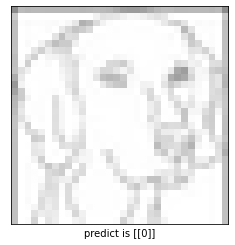

In [106]:
image="/content/test/test/200.jpg"
checkimg2(image,model)

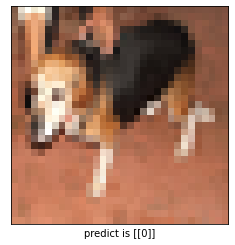

In [107]:
image="/content/test/test/201.jpg"
checkimg2(image,model)

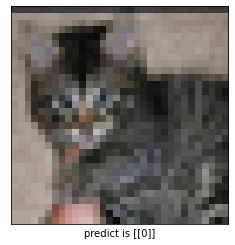

In [108]:
image="/content/test/test/202.jpg"
checkimg2(image,model)

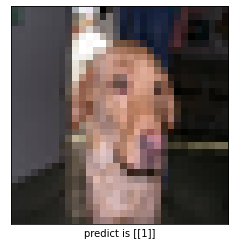

In [109]:
image="/content/test/test/203.jpg"
checkimg2(image,model)

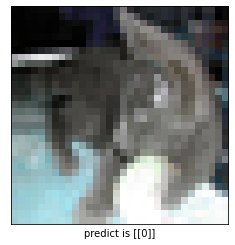

In [96]:
image="/content/test/test/100.jpg"
checkimg(image,model)

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def checkimg(image,model):
    img=Image.open(image)
    #resize 只需要两个数，（width，height）
    imgre=img.resize((32,32),Image.ANTIALIAS)
    data=np.array(imgre)
    #传入的x需要4维
    data4=data.reshape(1,32,32,3)
    prenum=model.predict_classes(data4,batch_size=1)
    
    classname=['cat','dog']
    plt.imshow(data,cmap="binary") #binary 只看黑白
    plt.xlabel("predict is {}".format(classname[prenum[0][0]]))
    plt.xticks([])
    plt.yticks([])

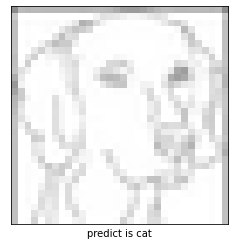

In [100]:
image="/content/test/test/200.jpg"
checkimg(image,model)

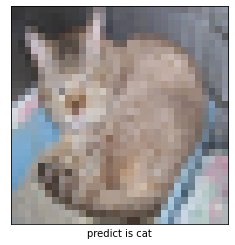

In [101]:
image="/content/test/test/300.jpg"
checkimg(image,model)

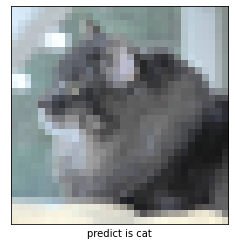

In [102]:
image="/content/test/test/230.jpg"
checkimg(image,model)

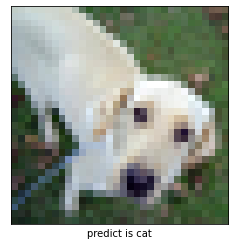

In [103]:
image="/content/test/test/229.jpg"
checkimg(image,model)